In [1]:
cd C:\UB\Studies\Semester 2\Computer Vision\Project 1\CSE473-573-Project 1

C:\UB\Studies\Semester 2\Computer Vision\Project 1\CSE473-573-Project 1


In [3]:
import argparse
import copy
import os
import cv2
import numpy as np
import utils
from task1 import *
from matplotlib import pyplot as plt

In [131]:
def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product
def ncc(image,temp):
    import numpy as np
    t_np=np.array(temp)
    i_np=np.array(image)
    t_np=t_np/t_np.sum()
    i_l=len(image)
    i_b=len(image[0])
    t_l=len(temp)
    t_b=len(temp[0])
    ncc_mat=np.zeros((i_l-t_l+1,i_b-t_b+1)).tolist()
    for i in range(i_l-t_l+1):
        for j in range(i_b-t_b+1):
            ncc_mat[i][j]=correlation_coefficient(i_np[i:i+t_l,j:j+t_b],t_np)
    return(ncc_mat)
def arg_max(arr,c):
    m=[]
    (l,b)=arr.shape
    for i in range(l):
        for j in range(b):
            if arr[i][j]>=c:
                m+=[(i,j)]
    return(m)

def remove_duplicates(m):
    dedup=[]
    for i in m:
        p,q=i[0],i[1]
        if (p-1,q) in dedup or (p+1,q) in dedup or (p,q-1) in dedup or (p,q+1) in dedup or (p+1,q+1) in dedup or (p-1,q-1) in dedup or (p+1,q-1) in dedup or (p-1,q+1) in dedup:
            pass 
        else: 
            dedup+=([i])
    return(dedup)

gaussian=np.array([[1,2,1],[2,4,2],[1,2,1]])

def check(img,coords):
    import matplotlib.pyplot as plt
    from matplotlib.patches import Arrow, Circle
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for i in coords:
        ax.add_patch(Circle((i[1], i[0]), radius=1, color='red'))
    plt.show(fig) 

def thresholding(temp,c):
    threshold=copy.deepcopy(temp)
    for i in range(len(temp)):
        for j in range(len(temp[0])):
            if temp[i][j]>c:
                threshold[i][j]=255
            else:
                threshold[i][j]=0
    return(threshold)

def resize(temp,r):
    l=len(temp)
    b=len(temp[0])
    l_new=int(l*r)
    b_new=int(b*r)
    resized = (cv2.resize(np.array(temp).astype('float32'), (b_new,l_new)).tolist())
    return(resized)
        
def plot(img):
    fig,ax=plt.subplots(figsize=(5,5))
    ax.imshow(img)
    plt.show(fig)

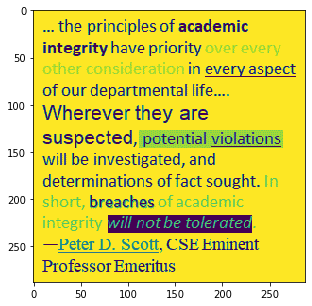

In [132]:
img=read_image('./data/proj1-task2-png.png')
plot(img)

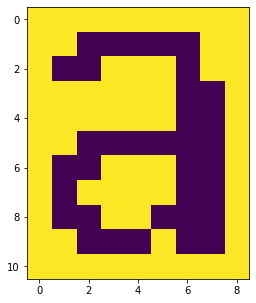

In [69]:
a=utils.crop(img,58,69,228,237)
a=thresholding(a,125)
plot(a)
write_image(a,'./a.jpg')

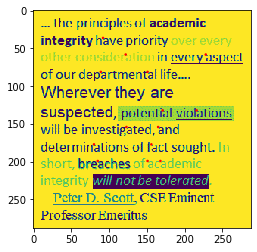

In [141]:
ncc_a=ncc(img,a)
coords=arg_max(np.array(ncc_a),0.89)
check(img,coords)

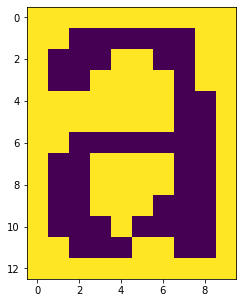

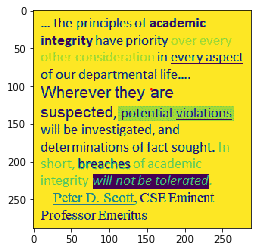

In [68]:
a_big=resize(a,1.2)
a_big=thresholding(a_big,140)
plot(a_big)
ncc_a=ncc(img,a_big)
coords=arg_max(np.array(ncc_a),0.7)
check(img,coords)

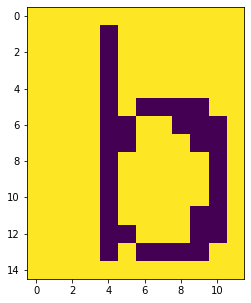

In [83]:
b=utils.crop(img,195,210,57,69)
b=thresholding(b,125)
plot(b)
write_image(b,'./b.jpg')

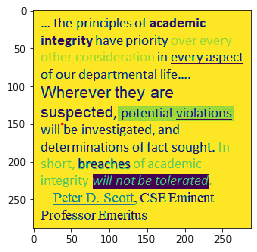

In [140]:
ncc_b=ncc(img,b)
coords=arg_max(np.array(ncc_b),0.89)
check(img,coords)

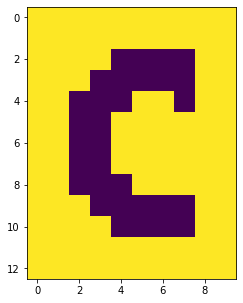

In [125]:
c=utils.crop(img,12,25,162,172)
c=thresholding(c,130)
plot(c)
write_image(c,'./c.jpg')

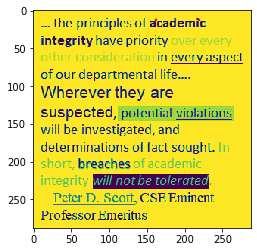

In [139]:
ncc_c=ncc(img,c)
coords=arg_max(np.array(ncc_c),0.89)
check(img,coords)

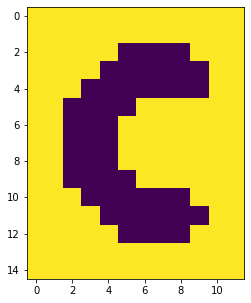

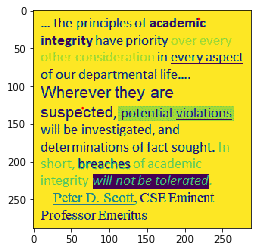

In [130]:
c_big=resize(c,1.2)
c_big=thresholding(c_big,140)
plot(c_big)
ncc_c=ncc(img,c_big)
coords=arg_max(np.array(ncc_c),0.7)
check(img,coords)

In [154]:
def detect(img,template):
    import numpy as np 
    import utils 
    def correlation_coefficient(patch1, patch2):
        product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
        stds = patch1.std() * patch2.std()
        if stds == 0:
            return 0
        else:
            product /= stds
            return product

    def ncc(image,temp):
        import numpy as np
        t_np=np.array(temp)
        i_np=np.array(image)
        t_np=t_np/t_np.sum()
        i_l=len(image)
        i_b=len(image[0])
        t_l=len(temp)
        t_b=len(temp[0])
        ncc_mat=np.zeros((i_l-t_l+1,i_b-t_b+1)).tolist()
        for i in range(i_l-t_l+1):
            for j in range(i_b-t_b+1):
                ncc_mat[i][j]=correlation_coefficient(i_np[i:i+t_l,j:j+t_b],t_np)
        return(ncc_mat)
    def arg_max(arr,c):
        m=[]
        (l,b)=arr.shape
        for i in range(l):
            for j in range(b):
                if arr[i][j]>=c:
                    m+=[(i,j)]
        return(m)

    def remove_duplicates(m):
        dedup=[]
        for i in m:
            p,q=i[0],i[1]
            if (p-1,q) in dedup or (p+1,q) in dedup or (p,q-1) in dedup or (p,q+1) in dedup or (p+1,q+1) in dedup or (p-1,q-1) in dedup or (p+1,q-1) in dedup or (p-1,q+1) in dedup:
                pass 
            else: 
                dedup+=([i])
        return(dedup)

    gaussian=np.array([[1,2,1],[2,4,2],[1,2,1]])

    def check(img,coords):
        import matplotlib.pyplot as plt
        from matplotlib.patches import Arrow, Circle
        fig, ax = plt.subplots(1)
        ax.imshow(img)
        for i in coords:
            ax.add_patch(Circle((i[1], i[0]), radius=1, color='red'))
        plt.show(fig) 

    def thresholding(temp,c):
        threshold=copy.deepcopy(temp)
        for i in range(len(temp)):
            for j in range(len(temp[0])):
                if temp[i][j]>c:
                    threshold[i][j]=255
                else:
                    threshold[i][j]=0
        return(threshold)

    def resize(temp,r):
        l=len(temp)
        b=len(temp[0])
        l_new=int(l*r)
        b_new=int(b*r)
        resized = (cv2.resize(np.array(temp).astype('float32'), (b_new,l_new)).tolist())
        return(resized)

    def plot(img):
        fig,ax=plt.subplots(figsize=(5,5))
        ax.imshow(img)
        plt.show(fig)
    
    ncc_raw=ncc(img,template)
    coords=arg_max(np.array(ncc_raw),0.89)
    if len(coords)<2:
        coords=arg_max(np.array(ncc_raw),0.87)
        coords=remove_duplicates(coords)
#         check(img,coords)
        return(coords)
    else: 
        coords=arg_max(np.array(ncc_raw),0.7)
        template_big=resize(template,1.2)
        template_big=thresholding(template_big,140)
        ncc_raw=ncc(img,template_big)
        coords=coords+arg_max(np.array(ncc_raw),0.7)
        coords=remove_duplicates(coords)
#         check(img,coords)
        return(coords)
        

    

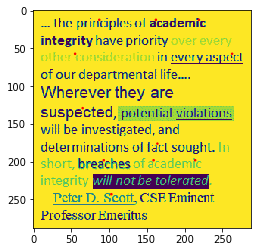

In [148]:
x=detect(img,c)

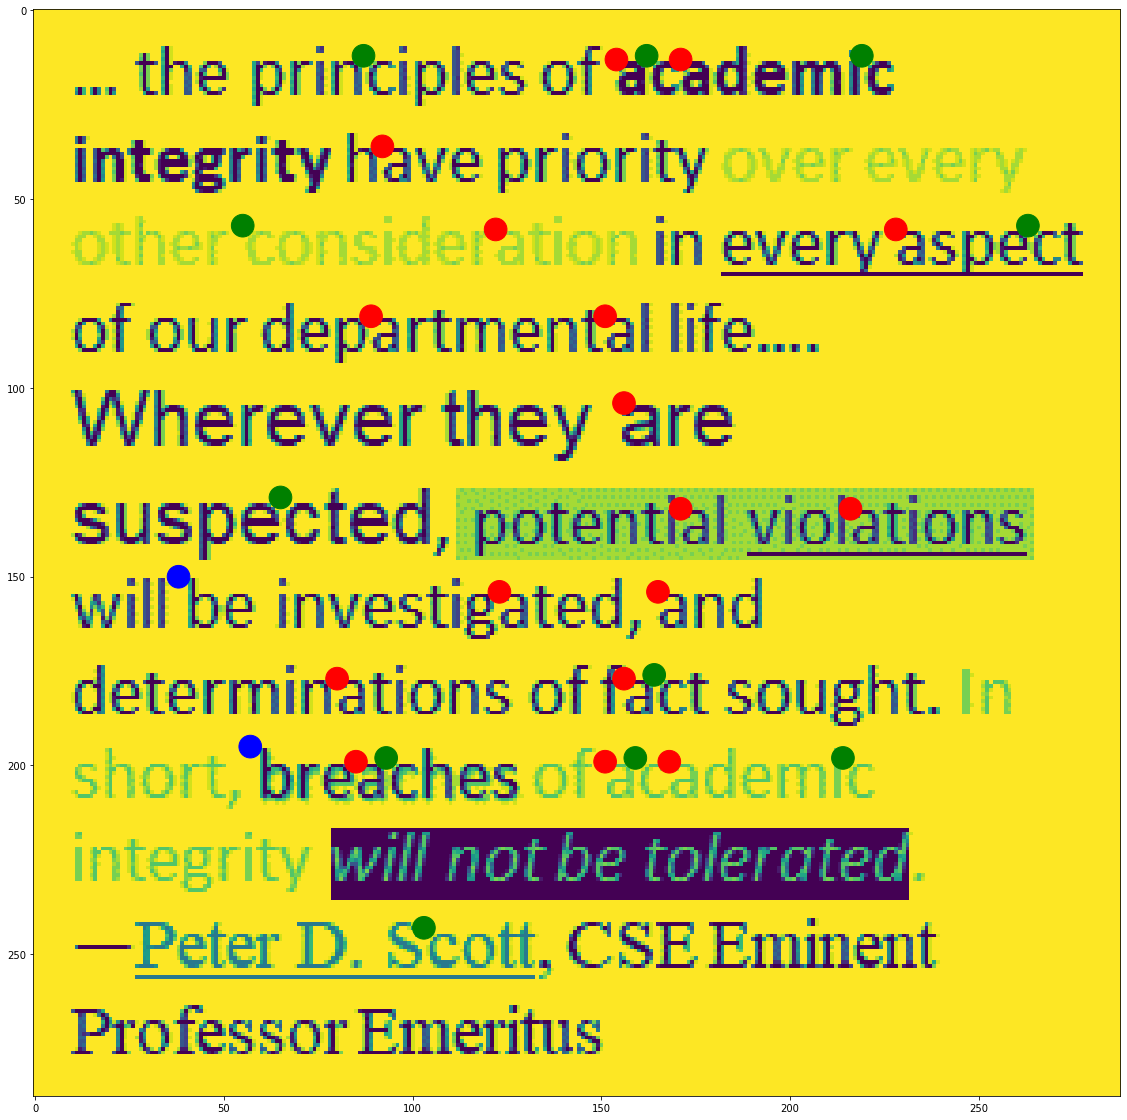

In [156]:
points_a=detect(img,a)
points_b=detect(img,b)
points_c=detect(img,c)

import matplotlib.pyplot as plt
from matplotlib.patches import Arrow, Circle
# fig, ax = plt.subplots(1)
fig,ax=plt.subplots(figsize=(20,20))
ax.imshow(img)
for i in points_a:
    ax.add_patch(Circle((i[1], i[0]), radius=3, color='red'))
for i in points_b:
    ax.add_patch(Circle((i[1], i[0]), radius=3, color='blue'))
for i in points_c:
    ax.add_patch(Circle((i[1], i[0]), radius=3, color='green'))
plt.show(fig) 

